In [17]:
def clean_text(text):
    #remove code blocks, urls, HTML code, special characters
    import re

    #code blocks (text between code tag)
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    
    #urls
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    text = re.sub(r'<a.*?</a>', '', text)

    #other HTML tag
    text = re.sub(r'<.*?>', '', text)
    
    #special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    #lowercase
    text = text.lower()
    
    return text

Example of Cleaned Titles:  what is gensims docvecs
Example of Cleaned Text:  what is gensims docvecs 

the above picture is from  the paper introducing docvec i am using gensims implementation of wordvec and docvec which are great but i am looking for clarity on a few issues


for a given docvec model  what is  my impression is that it is the averaged or concatenated vector that includes all of the word embedding and the paragraph vector  is this correct or is it d
supposing  is not  can one access d by itself how
as a bonus how is  calculated the paper only says



  in our paragraph vector framework see figure  every
  paragraph is mapped to a unique vector represented by a
  column in matrix d and every word is also mapped to a
  unique vector represented by a column in matrix w


thanks for any leads
 the  property of the docvec model holds all trained vectors for the document tags seen during training these are also referred to as doctags in the source code

in the most simple ca

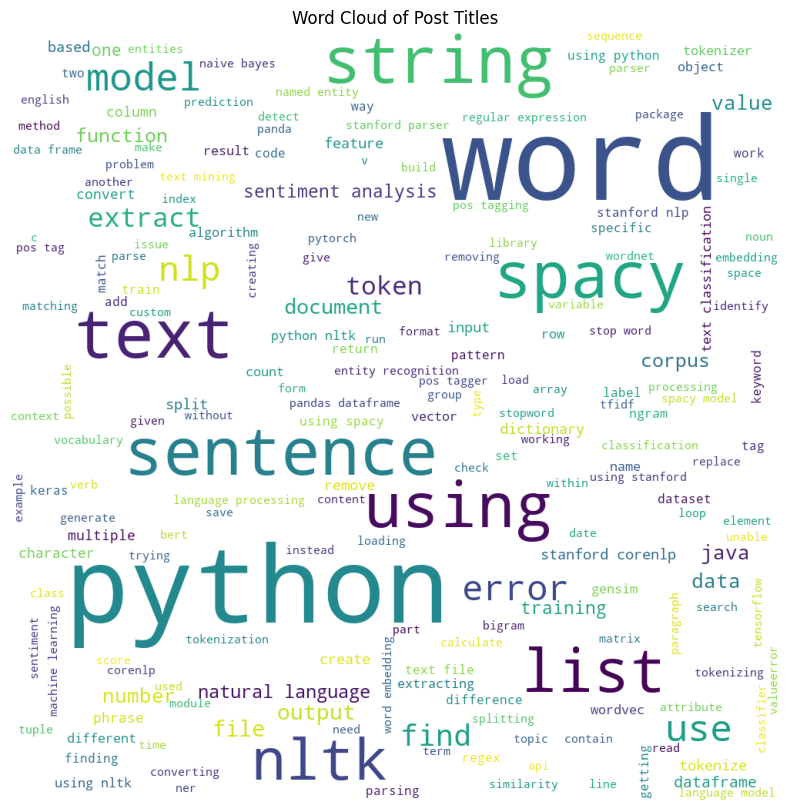

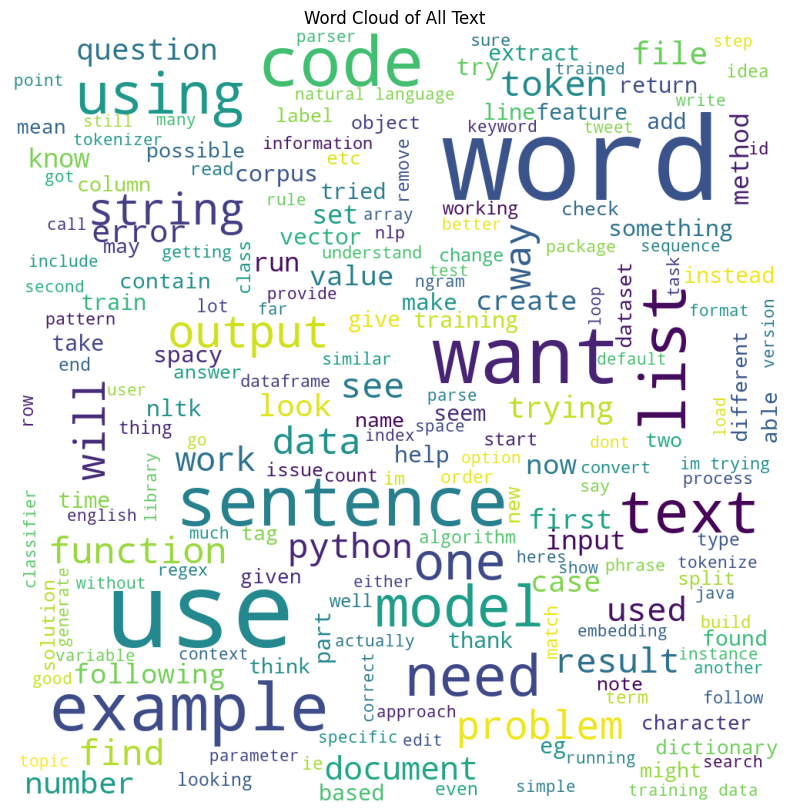

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from collections import Counter

df = pd.read_csv('questions_data_combined.csv', 
                 header=None,
                 names=["Title", "Description", "Tags", "Accepted Answer", "Answer Score", 
                        "Question Score", "Question Views", "Creation Time", "Link"])

df['Text_Only'] = ['']*len(df)
df['Cleaned_Title'] = ['']*len(df)

for i in range(1,len(df)):
    df.at[i,'Text_Only']=clean_text(df.iloc[i]['Title'] + " " + df.iloc[i]['Description'] + " " + df.iloc[i]['Accepted Answer']).strip()
    df.at[i,'Cleaned_Title']=clean_text(df.iloc[i]['Title']).strip()


file_name = "test_nlp.csv"

# with open(file_name, 'a', encoding='utf-8', newline='') as f:
#         df[:3000].to_csv(f, header=None, encoding='utf-8', index=False)

#print an example
print("Example of Cleaned Titles: ", df.iloc[3000]['Cleaned_Title'])
print("Example of Cleaned Text: ", df.iloc[3000]['Text_Only'],"\nLink: ",df.iloc[3000]['Link'])

all_text=' '.join(df['Text_Only'])

all_titles=' '.join(df['Cleaned_Title'])

wordcloud = WordCloud(
    width=1000,
    height=1000,
    stopwords=None,
    background_color='white',
    max_words=200,
    min_font_size=1,
    max_font_size=150,
    relative_scaling=1,
    random_state=1
).generate(all_titles)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Post Titles')
plt.savefig('wordcloud.png')
plt.show()


wordcloud = WordCloud(
    width=1000,
    height=1000,
    stopwords=None,
    background_color='white',
    max_words=200,
    min_font_size=1,
    max_font_size=150,
    relative_scaling=1,
    random_state=1
).generate(all_text)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.savefig('wordcloud_all.png')
plt.show()


